# Data Analysis for "Making Formulog Fast"

This Jupyter Notebook analyzes our experimental data.
It calculates the numbers reported in the paper, and also generates the figures and tables.

In [246]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

In [247]:
import __main__ as main

running_as_script = hasattr(main, "__file__")

if running_as_script:
    if len(sys.argv) != 3:
        print(f"usage: {sys.argv[0]} CSV_FILE TIMEOUT")
        exit(1)
    results_file = sys.argv[1]
    timeout = int(sys.argv[2])
else:
    results_file = "results.csv"
    timeout = 1800

## Data Wrangling

In [248]:
data = pd.read_csv(results_file)
data.head()

,case_study,benchmark,mode,success,interpret_time,interpret_cpu,interpret_mem,transpile_time,transpile_cpu,transpile_mem,...,smt_calls,smt_time,smt_mode,smt_eval_time,smt_wait_time,smt_cache_hits,smt_cache_misses,smt_cache_clears,work,parallelism
0,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,1.06,622.0,0.409920,...,95749.0,1400.84,push-pop,1400.84,0.0,0.318543,0.266951,0.0,14.16749,1
1,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,1.32,493.0,0.422564,...,95749.0,1399.77,push-pop,1399.77,0.0,0.318585,0.266909,0.0,14.16749,1
2,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,95749.0,1404.30,push-pop,1404.30,0.0,0.318589,0.266905,0.0,14.16749,1
3,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,95749.0,1403.21,push-pop,1403.21,0.0,0.318585,0.266909,0.0,14.16749,1
4,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,95749.0,1405.97,push-pop,1405.97,0.0,0.318589,0.266905,0.0,14.16749,1


In [249]:
def get_time(row):
    if row["mode"].startswith("interpret"):
        val = row["interpret_time"]
    else:
        val = row["execute_time"]
    if pd.isnull(val):
        val = timeout
    return val

In [250]:
data["time"] = data.apply(get_time, axis=1)

In [251]:
def get_cpu(row):
    if row["mode"].startswith("interpret"):
        val = row["interpret_cpu"]
    else:
        val = row["execute_cpu"]
    return val

In [252]:
data["cpu"] = data.apply(get_cpu, axis=1)

In [253]:
def get_mem(row):
    if row["mode"].startswith("interpret"):
        val = row["interpret_mem"]
    else:
        val = row["execute_mem"]
    return val

In [254]:
data["mem"] = data.apply(get_mem, axis=1)

In [255]:
data

,case_study,benchmark,mode,success,interpret_time,interpret_cpu,interpret_mem,transpile_time,transpile_cpu,transpile_mem,...,smt_eval_time,smt_wait_time,smt_cache_hits,smt_cache_misses,smt_cache_clears,work,parallelism,time,cpu,mem
0,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,1.06,622.0,0.409920,...,1400.840,0.000000,0.318543,0.266951,0.0,14.167490,1,1428.64,100.0,0.575100
1,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,1.32,493.0,0.422564,...,1399.770,0.000000,0.318585,0.266909,0.0,14.167490,1,1427.52,100.0,0.575104
2,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,1404.300,0.000000,0.318589,0.266905,0.0,14.167490,1,1431.72,100.0,0.574584
3,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,1403.210,0.000000,0.318585,0.266909,0.0,14.167490,1,1430.93,100.0,0.575488
4,dminor,all-100,compile-reorder,y,NaN,NaN,NaN,NaN,NaN,NaN,...,1405.970,0.000000,0.318589,0.266905,0.0,14.167490,1,1433.64,100.0,0.575368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,symex,sort-7,compile-unbatched,y,NaN,NaN,NaN,NaN,NaN,NaN,...,167.307,0.812753,5.144381,0.042631,383.0,305.292588,48,75.36,4678.0,7.455428
416,symex,sort-7,compile-unbatched,y,NaN,NaN,NaN,NaN,NaN,NaN,...,178.642,0.776562,5.143618,0.043394,392.0,305.288954,48,74.81,4723.0,7.379216
417,symex,sort-7,compile-unbatched,y,NaN,NaN,NaN,NaN,NaN,NaN,...,168.747,0.723678,5.145873,0.041139,367.0,305.286325,48,74.14,4675.0,7.425880
418,symex,sort-7,compile-unbatched,y,NaN,NaN,NaN,NaN,NaN,NaN,...,181.387,0.915866,5.143475,0.043537,393.0,305.289229,48,75.76,4722.0,7.433892


In [256]:
# Rename modes according to what we use in the paper
new_mode_names = {
    "interpret": "interpret",
    "interpret-reorder": "interpret",
    "interpret-unbatched": "interpret-eager",
    "compile": "compile",
    "compile-reorder": "compile",
    "compile-unbatched": "compile-eager",
    "klee": "klee",
    "cbmc": "cbmc",
    "scuba": "scuba",
}

data["mode"] = data["mode"].map(new_mode_names)

In [257]:
medians = data.groupby(["case_study", "benchmark", "mode", "parallelism"]).agg(
    {
        "smt_time": ["median"],
        "smt_cache_clears": ["median"],
        "time": ["median"],
        "work": ["median"],
        "cpu": ["median"],
        "mem": ["median"],
        "smt_cache_misses": ["median"],
    }
)

In [258]:
medians.columns = [
    "median_smt_time",
    "median_smt_cache_clears",
    "median_time",
    "median_work",
    "median_cpu",
    "median_mem",
    "median_smt_cache_misses",
]
medians = medians.reset_index()

In [259]:
medians

,case_study,benchmark,mode,parallelism,median_smt_time,median_smt_cache_clears,median_time,median_work,median_cpu,median_mem,median_smt_cache_misses
0,dminor,all-100,compile,1,1403.210000,0.0,1430.93,14.167490,100.0,0.575104,0.266909
1,dminor,all-100,compile,8,1461.970000,0.0,195.48,14.167490,780.0,0.587996,0.294516
2,dminor,all-100,compile,16,1625.170000,0.0,116.16,14.167490,1492.0,0.598040,0.309866
3,dminor,all-100,compile,24,1861.850000,0.0,93.48,14.167490,2164.0,0.625744,0.321398
4,dminor,all-100,compile,32,2381.600000,0.0,87.41,14.167490,2960.0,0.744216,0.332585
...,...,...,...,...,...,...,...,...,...,...,...
79,symex,sort-7,compile-eager,16,472.318419,257.0,93.42,305.285478,1641.0,6.863772,0.027386
80,symex,sort-7,compile-eager,24,540.196446,302.0,86.28,305.286257,2448.0,7.012864,0.032542
81,symex,sort-7,compile-eager,32,590.386893,335.0,81.58,305.286593,3251.0,7.143372,0.036398
82,symex,sort-7,compile-eager,40,703.830335,381.0,78.59,305.287301,4013.0,7.267528,0.041696


In [260]:
medians["mode_x_parallelism"] = list(zip(medians["mode"], medians["parallelism"]))
medians.head()

,case_study,benchmark,mode,parallelism,median_smt_time,median_smt_cache_clears,median_time,median_work,median_cpu,median_mem,median_smt_cache_misses,mode_x_parallelism
0,dminor,all-100,compile,1,1403.21,0.0,1430.93,14.16749,100.0,0.575104,0.266909,"(compile, 1)"
1,dminor,all-100,compile,8,1461.97,0.0,195.48,14.16749,780.0,0.587996,0.294516,"(compile, 8)"
2,dminor,all-100,compile,16,1625.17,0.0,116.16,14.16749,1492.0,0.598040,0.309866,"(compile, 16)"
3,dminor,all-100,compile,24,1861.85,0.0,93.48,14.16749,2164.0,0.625744,0.321398,"(compile, 24)"
4,dminor,all-100,compile,32,2381.60,0.0,87.41,14.16749,2960.0,0.744216,0.332585,"(compile, 32)"


In [261]:
def stats(df, process_row):
    def compute(df):
        res = df.apply(process_row, axis=1).agg(["mean", "min", "median", "max"])
        print(res)

    print("all:")
    compute(df)
    print("\ndminor:")
    compute(df[df["case_study"] == "dminor"])
    print("\nscuba:")
    compute(df[df["case_study"] == "scuba"])
    print("\nsymex:")
    compute(df[df["case_study"] == "symex"])


def speedup(df, mode, baseline):
    """Return the speedup of `mode` relative to `baseline`, calculated as
    `baseline` divided by `mode`"""
    def process_row(row):
        if not pd.isnull(row[mode]):
            return row[baseline] / row[mode]

    return stats(df, process_row)


def widen(df, val, columns="mode_x_parallelism"):
    return df.pivot(
        index=["case_study", "benchmark"], columns=columns, values=val
    ).reset_index()

In [262]:
times = widen(medians, "median_time")
smt_times = widen(medians, "median_smt_time")
work = widen(medians, "median_work")
cpu = widen(medians, "median_cpu")
mem = widen(medians, "median_mem")
smt_cache_misses = widen(medians, "median_smt_cache_misses")
times.head()

mode_x_parallelism,case_study,benchmark,"(compile, 1)","(compile, 8)","(compile, 16)","(compile, 24)","(compile, 32)","(compile, 40)","(compile, 48)","(compile-eager, 1)","(compile-eager, 8)","(compile-eager, 16)","(compile-eager, 24)","(compile-eager, 32)","(compile-eager, 40)","(compile-eager, 48)"
0,dminor,all-100,1430.93,195.48,116.16,93.48,87.41,90.79,98.26,1379.57,167.95,90.97,67.52,65.89,66.20,67.56
1,symex,interp-6,865.12,464.94,466.71,471.62,466.24,465.81,486.17,199.82,27.73,16.38,13.99,13.62,13.73,13.17
2,symex,numbrix-sat,4.60,16.06,23.47,26.67,9.65,9.21,22.66,5.19,12.05,17.02,17.13,19.66,23.93,21.30
3,symex,prioqueue-6,232.24,93.46,96.37,98.14,100.18,103.41,113.88,151.35,27.98,22.66,21.38,20.15,19.35,18.76
4,symex,shuffle-5,22.58,4.38,3.78,3.80,3.91,4.05,4.36,22.45,3.33,2.30,2.05,1.91,1.92,2.00


In [263]:
def scaling_speedup(row, baseline_nthreads=1):
    mode = row["mode"]
    entry = times[(times["benchmark"] == row["benchmark"]) & (times["case_study"] == row["case_study"])]
    baseline = entry[(mode, baseline_nthreads)].item()
    return baseline / row["median_time"]

medians["speedup"] = medians.apply(scaling_speedup, axis=1)
medians.head()

,case_study,benchmark,mode,parallelism,median_smt_time,median_smt_cache_clears,median_time,median_work,median_cpu,median_mem,median_smt_cache_misses,mode_x_parallelism,speedup
0,dminor,all-100,compile,1,1403.21,0.0,1430.93,14.16749,100.0,0.575104,0.266909,"(compile, 1)",1.000000
1,dminor,all-100,compile,8,1461.97,0.0,195.48,14.16749,780.0,0.587996,0.294516,"(compile, 8)",7.320084
2,dminor,all-100,compile,16,1625.17,0.0,116.16,14.16749,1492.0,0.598040,0.309866,"(compile, 16)",12.318612
3,dminor,all-100,compile,24,1861.85,0.0,93.48,14.16749,2164.0,0.625744,0.321398,"(compile, 24)",15.307338
4,dminor,all-100,compile,32,2381.60,0.0,87.41,14.16749,2960.0,0.744216,0.332585,"(compile, 32)",16.370324


In [264]:
def smt_heavy(df):
    return df[(df["case_study"] != "scuba")]

In [265]:
times

mode_x_parallelism,case_study,benchmark,"(compile, 1)","(compile, 8)","(compile, 16)","(compile, 24)","(compile, 32)","(compile, 40)","(compile, 48)","(compile-eager, 1)","(compile-eager, 8)","(compile-eager, 16)","(compile-eager, 24)","(compile-eager, 32)","(compile-eager, 40)","(compile-eager, 48)"
0,dminor,all-100,1430.93,195.48,116.16,93.48,87.41,90.79,98.26,1379.57,167.95,90.97,67.52,65.89,66.20,67.56
1,symex,interp-6,865.12,464.94,466.71,471.62,466.24,465.81,486.17,199.82,27.73,16.38,13.99,13.62,13.73,13.17
2,symex,numbrix-sat,4.60,16.06,23.47,26.67,9.65,9.21,22.66,5.19,12.05,17.02,17.13,19.66,23.93,21.30
3,symex,prioqueue-6,232.24,93.46,96.37,98.14,100.18,103.41,113.88,151.35,27.98,22.66,21.38,20.15,19.35,18.76
4,symex,shuffle-5,22.58,4.38,3.78,3.80,3.91,4.05,4.36,22.45,3.33,2.30,2.05,1.91,1.92,2.00
5,symex,sort-7,782.74,122.57,81.70,71.40,71.23,69.51,70.74,592.49,113.37,93.42,86.28,81.58,78.59,75.36


In [266]:
os.makedirs("figures", exist_ok=True)

In [274]:
# Full scaling table

nthreads = (1, 8, 16, 24, 32, 40, 48)

def make_table_row(row, acc):
    def time(mode, baseline):
        if pd.isnull(row[mode]):
            return "-"
        if row[mode] == timeout:
            return "TO"
        else:
            t = f"{row[mode]:0.2f}"
            bf = t == best
            # if baseline != None and not pd.isnull(baseline):
            #     speedup = baseline / row[mode]
            #     t = f"{t} ({speedup:0.1f}$\\times$)"
            if bf:
                t = "{\\bf %s}" % t
            return t

    times = [row[(mode, j)] for mode in ("compile", "compile-eager") for j in nthreads]
    best = min(t for t in times if not pd.isnull(t))
    best = f"{best:0.2f}"

    s = []
    s.append(f"{row['case_study']} & {row['benchmark']}")
    for i, j in enumerate(nthreads):
        baseline = row[("compile", nthreads[0])] if i > 0 else None 
        s.extend([" & ", time(("compile", j), baseline)])
    s.extend([" &"])
    for i, j in enumerate(nthreads):
        baseline = row[("compile-eager", nthreads[0])] if i > 0 else None 
        s.extend([" & ", time(("compile-eager", j), baseline)])
    s.append(r"\\")
    acc.append("".join(s))


nconfigs = len(nthreads)
s = []
s.append(r"\documentclass{article}")
s.append(r"\usepackage{colortbl}")
s.append(r"\usepackage{multirow}")
s.append(r"\usepackage{color}")
s.append(r"\usepackage{booktabs}")
s.append(r"\usepackage{pdflscape}")
s.append(r"\definecolor{Gray}{gray}{0.9}")
s.append(r"\begin{document}")
s.append(r"\scriptsize")
s.append(r"\begin{landscape}")
s.append(r"\begin{tabular}{ll" + "r" * (2 * nconfigs + 1) + r"}")
s.append(r"\toprule")
s.append(
    r"& & \multicolumn{" + str(nconfigs) + r"}{c}{Semi-naive evaluation} & & \multicolumn{" + str(nconfigs) + r"}{c}{Eager evaluation} \\"
)
line1_end = 3 + nconfigs - 1
line2_start = line1_end + 2
line2_end = line2_start + nconfigs - 1
s.append(r"\cline{3-" + str(line1_end) + r"} \cline{" + str(line2_start) + "-" + str(line2_end) + r"}")
thread_header = " ".join([f"& {x}" for x in nthreads])
s.append(
    r"& & \multicolumn{" + str(nconfigs) + r"}{c}{\# threads} & & \multicolumn{" + str(nconfigs) + r"}{c}{\# threads}\\"
)
s.append(
    r"Case study & Benchmark" + thread_header + "& " + thread_header + r"\\"
)
s.append(r"\midrule")
times.apply(lambda row: make_table_row(row, s), axis=1)
s.append(r"\bottomrule")
s.append(r"\end{tabular}")
s.append(r"\end{landscape}")
s.append(r"\end{document}")
with open(os.path.join("figures", "scaling_tab.tex"), "w") as f:
    f.write("\n".join(s))

In [268]:
# From https://jwalton.info/Embed-Publication-Matplotlib-Latex/
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**0.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


width = 395.8225

<Figure size 640x480 with 0 Axes>

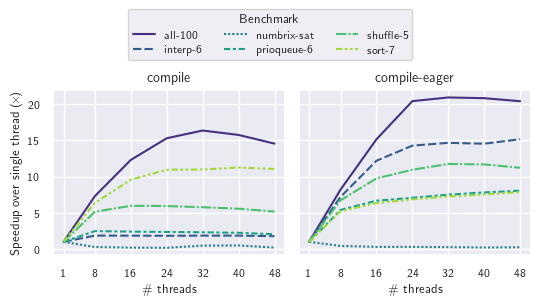

In [289]:
plt.clf()
sns.set_theme()

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": not running_as_script,
    "font.family": "sans-serif",
    # Use 9pt font in plots
    "axes.labelsize": 9,
    "font.size": 9,
    "axes.titlesize": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "text.latex.preamble": r"\usepackage[cm]{sfmath}",
    "legend.title_fontsize": 9,
}

plt.rcParams.update(tex_fonts)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
bms = ["all-100", "interp-6", "numbrix-sat", "prioqueue-6", "shuffle-5", "sort-7"]
sns.lineplot(
    data=medians[medians["mode"] == "compile"],
    y="speedup",
    hue="benchmark",
    x="parallelism",
    ax=ax1,
    palette="viridis",
    style="benchmark",
    hue_order=bms,
)
ax1.set(
    ylabel=r"Speedup over single thread $(\!\times\!)$",
    xlabel=r"\# threads",
    xticks=nthreads,
    title="compile",
)

sns.lineplot(
    data=medians[medians["mode"] == "compile-eager"],
    y="speedup",
    hue="benchmark",
    x="parallelism",
    ax=ax2,
    palette="viridis",
    style="benchmark",
    hue_order=bms,
    legend=None,
)
ax2.tick_params(axis="y", which="both", left=False, labelleft=False)
ax2.set(ylabel=None, xlabel=r"\# threads", xticks=nthreads, title="compile-eager")

handles, labels = ax1.get_legend_handles_labels()
leg = fig.legend(
    handles,
    labels,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.22),
    ncol=3,
    title="Benchmark",
)
ax1.get_legend().remove()
(inch_width, _) = set_size(width)
fig.set_size_inches(inch_width, 2.5)
plt.tight_layout()
plt.savefig(os.path.join("figures", "scaling_fig.pdf"), bbox_inches="tight", dpi=100)

In [270]:
speedup(times, ("compile-eager", 1), ("compile", 1))

all:
mean      1.685733
min       0.886320
median    1.179166
max       4.329497
dtype: float64

dminor:
mean      1.037229
min       1.037229
median    1.037229
max       1.037229
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean      1.815433
min       0.886320
median    1.321102
max       4.329497
dtype: float64


In [271]:
speedup(smt_times, ("compile-eager", 1), ("compile", 1))

all:
mean      2.118252
min       0.859386
median    1.547471
max       5.190907
dtype: float64

dminor:
mean      1.042378
min       1.042378
median    1.042378
max       1.042378
dtype: float64

scuba:
mean     NaN
min      NaN
median   NaN
max      NaN
dtype: float64

symex:
mean      2.333427
min       0.859386
median    2.001082
max       5.190907
dtype: float64


In [272]:
def smt_scaling_speedup(row, baseline_nthreads=1):
    mode = row["mode"]
    entry = smt_times[(times["benchmark"] == row["benchmark"]) & (smt_times["case_study"] == row["case_study"])]
    baseline = entry[(mode, baseline_nthreads)].item()
    return baseline / row["median_smt_time"]

medians["smt_speedup"] = medians.apply(smt_scaling_speedup, axis=1)
medians.head(20)

,case_study,benchmark,mode,parallelism,median_smt_time,median_smt_cache_clears,median_time,median_work,median_cpu,median_mem,median_smt_cache_misses,mode_x_parallelism,speedup,smt_speedup
0,dminor,all-100,compile,1,1403.210000,0.0,1430.93,14.167490,100.0,0.575104,0.266909,"(compile, 1)",1.000000,1.000000
1,dminor,all-100,compile,8,1461.970000,0.0,195.48,14.167490,780.0,0.587996,0.294516,"(compile, 8)",7.320084,0.959808
2,dminor,all-100,compile,16,1625.170000,0.0,116.16,14.167490,1492.0,0.598040,0.309866,"(compile, 16)",12.318612,0.863424
3,dminor,all-100,compile,24,1861.850000,0.0,93.48,14.167490,2164.0,0.625744,0.321398,"(compile, 24)",15.307338,0.753664
4,dminor,all-100,compile,32,2381.600000,0.0,87.41,14.167490,2960.0,0.744216,0.332585,"(compile, 32)",16.370324,0.589188
5,dminor,all-100,compile,40,2982.290000,0.0,90.79,14.167490,3597.0,0.988212,0.344358,"(compile, 40)",15.760877,0.470514
6,dminor,all-100,compile,48,3654.400000,0.0,98.26,14.167490,4257.0,1.243616,0.355690,"(compile, 48)",14.562691,0.383978
7,dminor,all-100,compile-eager,1,1346.161817,0.0,1379.57,12.499506,100.0,0.603776,0.431531,"(compile-eager, 1)",1.000000,1.000000
8,dminor,all-100,compile-eager,8,1303.304300,0.0,167.95,12.921539,802.0,0.627188,0.431831,"(compile-eager, 8)",8.214171,1.032884
9,dminor,all-100,compile-eager,16,1400.070500,0.0,90.97,12.921764,1582.0,0.657056,0.431944,"(compile-eager, 16)",15.165109,0.961496


<Figure size 640x480 with 0 Axes>

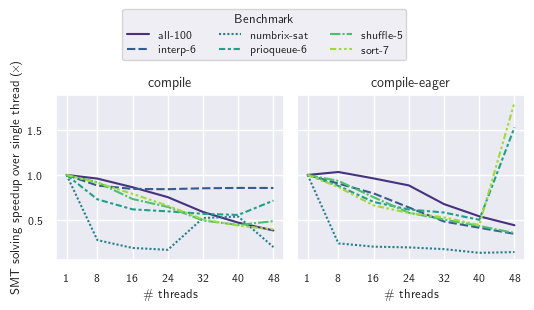

In [290]:
plt.clf()
sns.set_theme()

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": not running_as_script,
    "font.family": "sans-serif",
    # Use 9pt font in plots
    "axes.labelsize": 9,
    "font.size": 9,
    "axes.titlesize": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "text.latex.preamble": r"\usepackage[cm]{sfmath}",
    "legend.title_fontsize": 9,
}

plt.rcParams.update(tex_fonts)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
bms = ["all-100", "interp-6", "numbrix-sat", "prioqueue-6", "shuffle-5", "sort-7"]
sns.lineplot(
    data=medians[medians["mode"] == "compile"],
    y="smt_speedup",
    hue="benchmark",
    x="parallelism",
    ax=ax1,
    palette="viridis",
    style="benchmark",
    hue_order=bms,
)
ax1.set(
    ylabel=r"SMT solving speedup over single thread $(\!\times\!)$",
    xlabel=r"\# threads",
    xticks=nthreads,
    title="compile",
)

sns.lineplot(
    data=medians[medians["mode"] == "compile-eager"],
    y="smt_speedup",
    hue="benchmark",
    x="parallelism",
    ax=ax2,
    palette="viridis",
    style="benchmark",
    hue_order=bms,
    legend=None,
)
ax2.tick_params(axis="y", which="both", left=False, labelleft=False)
ax2.set(ylabel=None, xlabel=r"\# threads", xticks=nthreads, title="compile-eager")

handles, labels = ax1.get_legend_handles_labels()
leg = fig.legend(
    handles,
    labels,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.24),
    ncol=3,
    title="Benchmark",
)
ax1.get_legend().remove()
(inch_width, _) = set_size(width)
fig.set_size_inches(inch_width, 2.5)
plt.tight_layout()
plt.savefig(
    os.path.join("figures", "smt_scaling_fig.pdf"), bbox_inches="tight", dpi=100
)